# EMAIL SPAM DETECTION

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\PRADEEPA\Downloads\spam.csv")

In [4]:
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.columns

Index(['Category', 'Message'], dtype='object')

# Representing ham as 0 and spam as 1

In [6]:
data['Category']=data['Category'].map({'ham':0,'spam':1})

In [7]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cv=CountVectorizer()

In [10]:
x=data['Message']
y=data['Category']

In [11]:
x.shape

(5572,)

In [12]:
y.shape

(5572,)

In [13]:
x=cv.fit_transform(x)

In [14]:
x

<5572x8748 sparse matrix of type '<class 'numpy.int64'>'
	with 74277 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train.shape

(4457, 8748)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [25]:
result=model.score(x_test,y_test)
result=result*100
result

98.9237668161435

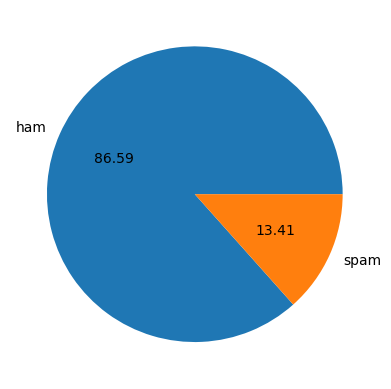

In [26]:
import matplotlib.pyplot as plt
plt.pie(data['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Text(0.5, 1.0, 'Bar Graph for spams detection')

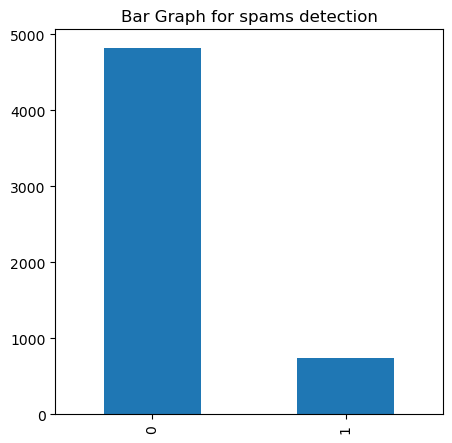

In [27]:
top_10=data['Category'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(5,5))
plt.title('Bar Graph for spams detection')

Text(0, 0.5, 'Message')

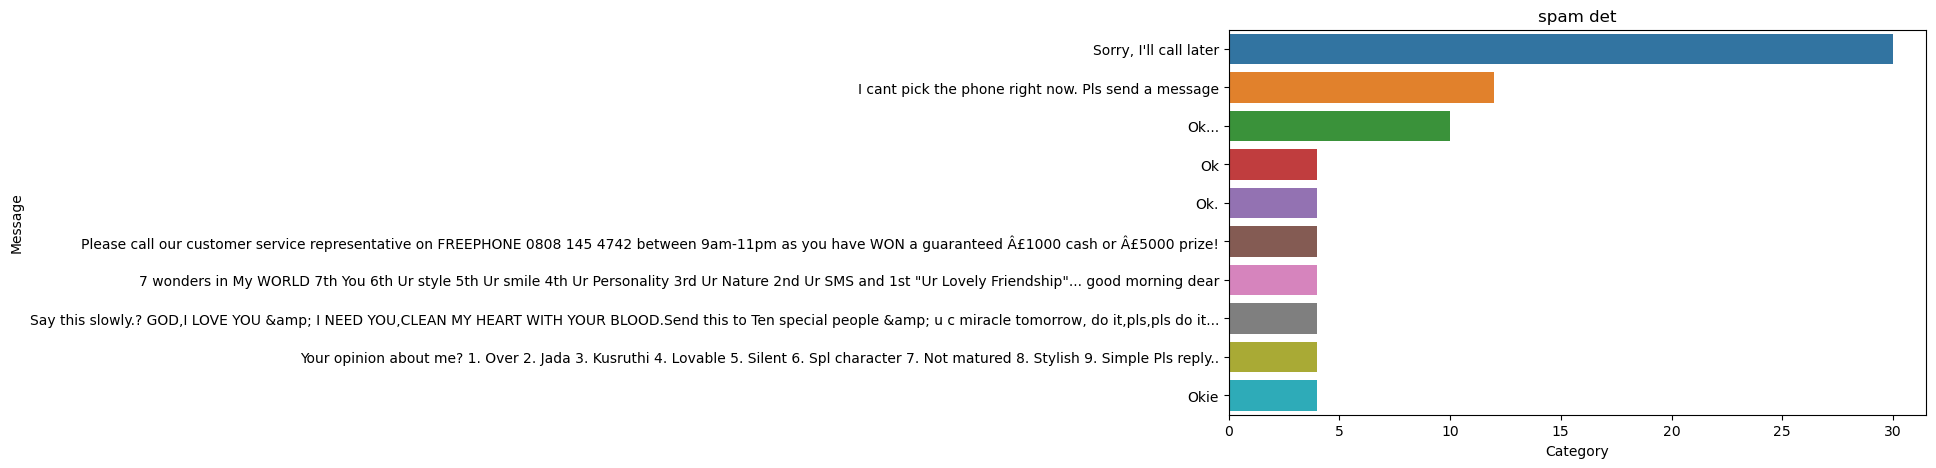

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns 
spam_order=data['Message'].value_counts().head(10).index
plt.figure(figsize=(9,5))
sns.countplot(data=data,y='Message',order=spam_order)
plt.title('spam det')
plt.xlabel('Category')
plt.ylabel('Message')

In [30]:
msg="you have won 10 dollars!!"
data=[msg]
vect=cv.transform(data).toarray()
result=model.predict(vect)
print(result)

[1]
